<a href="https://colab.research.google.com/github/kobestenson/COMPPHYS/blob/main/Kobe_Stenson_Lab08_part2_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pyplot and numpy
import numpy as np
import matplotlib.pyplot as plt

# import fft and ifft from numpy.fft
from numpy.fft import fft
from numpy.fft import ifft

# Part 1: Code Your Own FFT

(5 points)

Using the slides from class, implement your own version of the discrete fourier transform.




In [ ]:
# your function here
def dft(y):
  """
  PARAMETERS
  y: array giving amplitude at evenly spaced time intervals

  RETURN
  c: fourier coefficients

  """
  # you can copy code from the slides
  from numpy import zeros
  from cmath import exp,pi

  N = len(y)

  c = np.zeros(N//2+1, complex)

  for n in range(N//2+1):

    for m in range(N):
      c[n] += y[m]*exp(-2j*pi*m*n/N)

  return c



Rebuild your composite cosine wave from the first part of the lab, and feed the amplitude into your dft function.  Compare your results with those from the `numpy.fft.fft` function.

[2.  1.  0.5]


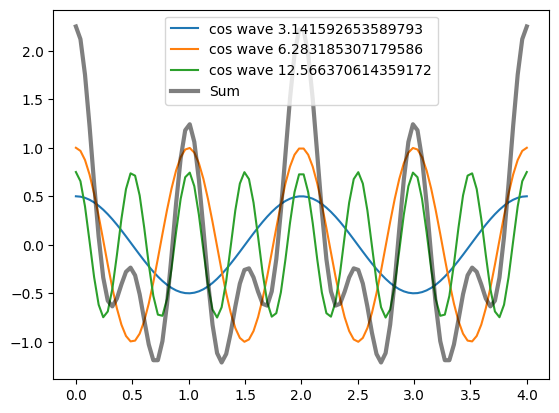

In [ ]:
# rebuild sum of 3 cosine waves here
om = np.array([np.pi,2*np.pi,4*np.pi])
Twave = 2*np.pi/om
print(Twave)
amp = [0.5,1,0.75]
phi = [np.pi/2,np.pi,3*np.pi/2]
phi = np.zeros(len(om))
t = np.linspace(0,4,100)
plt.figure()
sumwave = np.zeros(len(t))
for i,o in enumerate(om):
  y = amp[i]*np.cos(om[i]*t+phi[i])
  sumwave += y
  plt.plot(t,y,label=f"cos wave {o}")
plt.plot(t,sumwave,lw='3',color='k',ls='-',label='Sum',alpha=0.5)
plt.legend()

In [ ]:
# pass your y array into your dft function
y_ar = dft(y)

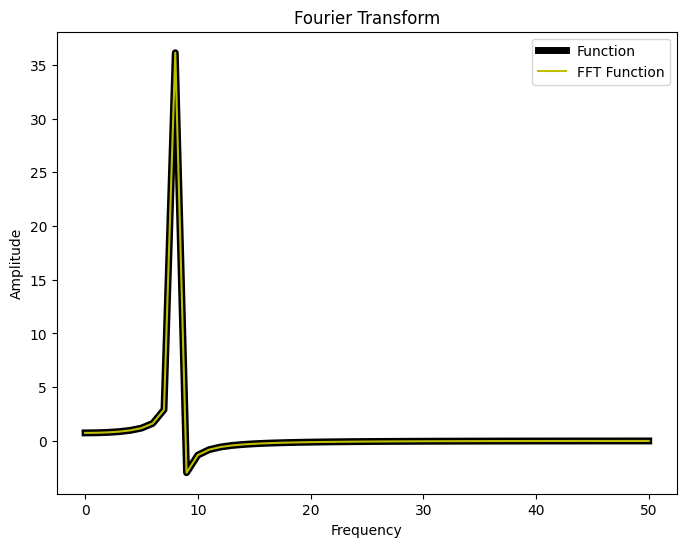

In [ ]:
# compare the output from your function with the output from np.fft.fft
# plot the frequency spectrum for both
ff = np.fft.rfft(y)

plt.figure(figsize=(8,6))
plt.plot(y_ar,'k',lw=5,label='Function')
plt.plot(ff,'y',label='FFT Function')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform')
plt.legend()

In [ ]:
# time how long it takes the dft function to run
%time dft(sumwave)

CPU times: user 19.6 ms, sys: 0 ns, total: 19.6 ms
Wall time: 19.4 ms


array([ 2.25000000e+00+0.00000000e+00j,  2.48755810e+00+7.81746625e-02j,
        2.71774728e+01+1.70986166e+00j,  2.66790128e+00+2.52190922e-01j,
        5.05375432e+01+6.38437642e+00j, -7.51465724e-01-1.19020478e-01j,
        7.59728738e-01+1.44926008e-01j,  2.38131144e+00+5.32286170e-01j,
        3.57607549e+01+9.18180127e+00j, -3.21965085e+00-9.35395042e-01j,
       -1.52229082e+00-4.94622272e-01j, -9.70319279e-01-3.49336436e-01j,
       -6.93708172e-01-2.74658495e-01j, -5.27245463e-01-2.28159486e-01j,
       -4.16313647e-01-1.95902332e-01j, -3.37406280e-01-1.71917087e-01j,
       -2.78669792e-01-1.53200014e-01j, -2.33456032e-01-1.38065512e-01j,
       -1.97740073e-01-1.25489666e-01j, -1.68940534e-01-1.14811869e-01j,
       -1.45325568e-01-1.05585206e-01j, -1.25690472e-01-9.74955236e-02j,
       -1.09171956e-01-9.03148968e-02j, -9.51358237e-02-8.38735110e-02j,
       -8.31062381e-02-7.80419522e-02j, -7.27196506e-02-7.27196506e-02j,
       -6.36938934e-02-6.78271073e-02j, -5.58069216

In [ ]:
# time how long it takes the fft fuction to run
%time fft(sumwave)

CPU times: user 456 µs, sys: 963 µs, total: 1.42 ms
Wall time: 1.34 ms


array([ 2.25000000e+00+0.00000000e+00j,  2.48755810e+00+7.81746625e-02j,
        2.71774728e+01+1.70986166e+00j,  2.66790128e+00+2.52190922e-01j,
        5.05375432e+01+6.38437642e+00j, -7.51465724e-01-1.19020478e-01j,
        7.59728738e-01+1.44926008e-01j,  2.38131144e+00+5.32286170e-01j,
        3.57607549e+01+9.18180127e+00j, -3.21965085e+00-9.35395042e-01j,
       -1.52229082e+00-4.94622272e-01j, -9.70319279e-01-3.49336436e-01j,
       -6.93708172e-01-2.74658495e-01j, -5.27245463e-01-2.28159486e-01j,
       -4.16313647e-01-1.95902332e-01j, -3.37406280e-01-1.71917087e-01j,
       -2.78669792e-01-1.53200014e-01j, -2.33456032e-01-1.38065512e-01j,
       -1.97740073e-01-1.25489666e-01j, -1.68940534e-01-1.14811869e-01j,
       -1.45325568e-01-1.05585206e-01j, -1.25690472e-01-9.74955236e-02j,
       -1.09171956e-01-9.03148968e-02j, -9.51358237e-02-8.38735110e-02j,
       -8.31062381e-02-7.80419522e-02j, -7.27196506e-02-7.27196506e-02j,
       -6.36938934e-02-6.78271073e-02j, -5.58069216

# Part 2: The Inverse Fourier Transform

(5 points)

Take the `fft` and then the `ifft` of your summed cosine wave.

```
Y = fft(sumwave)
ynew = ifft(Y)
```

Compare the output of the `ifft` (ynew) with the original wave (sumwave). To do this, plot both waves on the same plot.  Plot the original with a solid line and the recreated wave with black circles.  Be sure to add a legend and lable your axes.

Here is my result for comparison:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p2.png" width=300 >

In [ ]:
# your code here
Y = np.fft.rfft(sumwave)
ynew = np.fft.irfft(Y)

Text(0, 0.5, 'Amplitude')

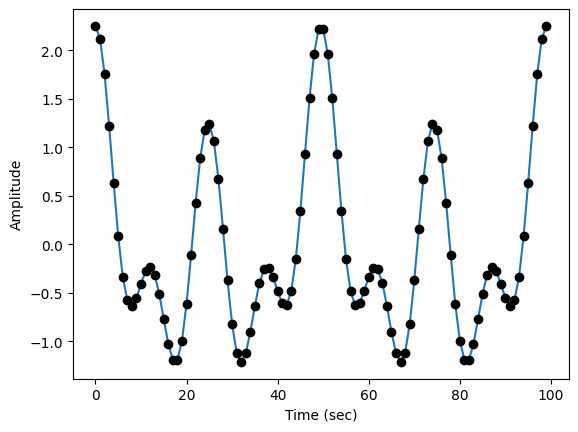

In [ ]:
# your plot here
plt.plot(ynew)
plt.plot(ynew,'ko')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')

# Part 3: Filter out noise from an audio signal

(5 points)

Make a program that will filter out noise from an audio signal.  
* To do this, you should construct a sine or cosine function, with a frequency of 1 Hz.

* Add two additional cosine functions with a frequency that are 10 and 15 times higher and an amplitude that is 10 and 15 times lower.

* We will consider the high frequency waves to be noise.

* Make a function called `filter_noise` that takes the input wave and returns the cleaned function

Here is the wave I made:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p3a.png" width=300 >


Here is the a figure showing the Fourier components of the original and cleaned signal:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p3b.png" width=300 >

Here is my input and cleaned signals:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p3c.png" width=300 >

Text(0, 0.5, 'Amplitude')

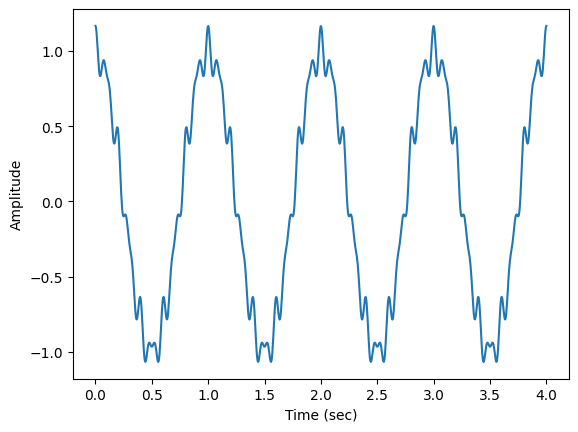

In [ ]:
# Your code here to construct input signal
t = np.linspace(0,4,1000) # 0 to 4 seconds
signal = 1*np.cos(t*2*np.pi) + 1/10*np.cos(t*20*np.pi) + 1/15*np.cos(t*30*np.pi)



# plot the input signal
plt.plot(t,signal)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')


In [ ]:
def filter_noise(y,fmax=10):
  # take the fft
  Y = np.fft.rfft(y)
  n = len(t)
  TMAX = (t[1]-t[0])*(n-1)
  df = 1/TMAX

  # filter noise - any frequencies above fmax
  freq = np.arange(int(n/2)+1)*df
  # take the ifft of the filtered wave
  Yfilt = Y.copy()
  Yfilt[freq >= fmax]=0
  yfiltered = np.fft.irfft(Yfilt)

  plt.figure()
  plt.plot(freq,Y,'bo')
  plt.plot(freq,Yfilt,'ks',markersize=14,mfc='None')
  # return results
  return yfiltered

Text(0, 0.5, 'Amplitude')

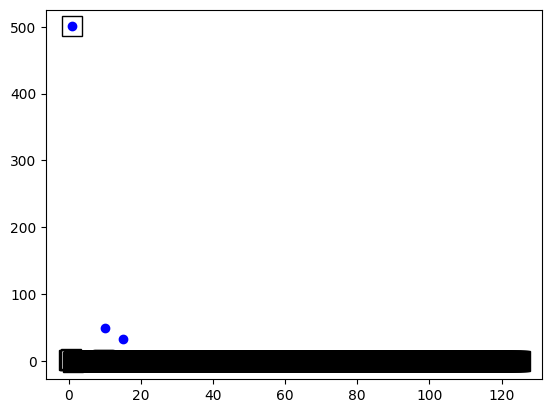

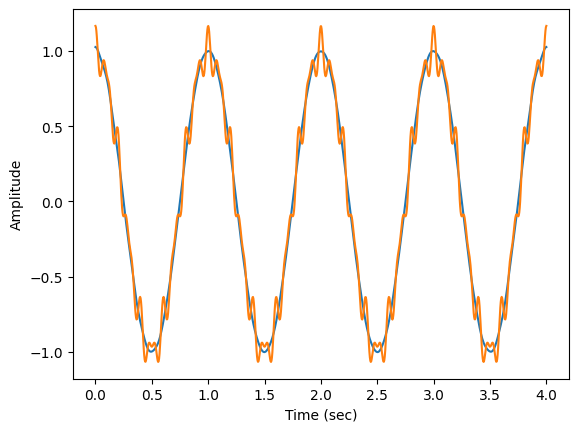

In [ ]:
filt = filter_noise(signal)

plt.figure()
plt.plot(t,filt)
plt.plot(t,signal)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')

# Part 4: Read in wav file and analyze it

(10 points)

We'll explore how the different combinations of waves (called *overtones*) produces different timbres for different instruments.

First we'll listen to and then download some files of different instruments playing the same note: C4, which is the same as 262 Hz, for the dominant wave.

These .wav files come from [the University of Iowa musical instrument samples](https://www.ee.columbia.edu/~dpwe/sounds/instruments/).

In [ ]:
from IPython.display import Audio,display

In [ ]:
url_t='https://www.ee.columbia.edu/~dpwe/sounds/instruments/trumpet-C4.wav'
url_v='https://www.ee.columbia.edu/~dpwe/sounds/instruments/violin-C4.wav'
url_f='https://www.ee.columbia.edu/~dpwe/sounds/instruments/flute-C4.wav'
url_p='https://www.ee.columbia.edu/~dpwe/sounds/instruments/piano-C4.wav'

Audio(url=url_t)
Audio(url=url_v)
Audio(url=url_f)
Audio(url=url_p)

Now download the wav files for analysis.

In [ ]:
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/piano-C4.wav -O pianoC4.wav
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/trumpet-C4.wav -O trumpetC4.wav
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/violin-C4.wav -O violinC4.wav
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/flute-C4.wav -O fluteC4.wav

--2024-03-23 00:14:03--  https://www.ee.columbia.edu/~dpwe/sounds/instruments/piano-C4.wav
Resolving www.ee.columbia.edu (www.ee.columbia.edu)... 162.159.138.64, 162.159.128.65, 2606:4700:7::a29f:8a40, ...
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.138.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59544 (58K) [audio/x-wav]
Saving to: ‘pianoC4.wav’

pianoC4.wav         100%[===================>]  58.15K  --.-KB/s    in 0.003s  

2024-03-23 00:14:04 (22.2 MB/s) - ‘pianoC4.wav’ saved [59544/59544]

--2024-03-23 00:14:04--  https://www.ee.columbia.edu/~dpwe/sounds/instruments/trumpet-C4.wav
Resolving www.ee.columbia.edu (www.ee.columbia.edu)... 162.159.138.64, 162.159.128.65, 2606:4700:7::a29f:8041, ...
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.138.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172210 (168K) [audio/x-wav]
Saving to: ‘trumpetC4.wav’

trumpetC4.wav       100%[=============

### Reading in a wav file

There are many tools to read in wave files.  We will use `scipy.io.wavfile`, but also check out [`librosa`](https://librosa.org/doc/latest/index.html).

In [ ]:
from scipy.io import wavfile


In [ ]:
samplerate_v, signal_v = wavfile.read('violinC4.wav')
samplerate_p, signal_p = wavfile.read('pianoC4.wav')
samplerate_t, signal_t = wavfile.read('trumpetC4.wav')
samplerate_f, signal_f = wavfile.read('fluteC4.wav')

In [ ]:
Audio(data=signal_v, rate=samplerate_v)


In [ ]:
Audio(data=signal_p, rate=samplerate_p)

In [ ]:
Audio(data=signal_t, rate=samplerate_t)

In [ ]:
Audio(data=signal_f, rate=samplerate_f)

Text(0, 0.5, 'amplitude')

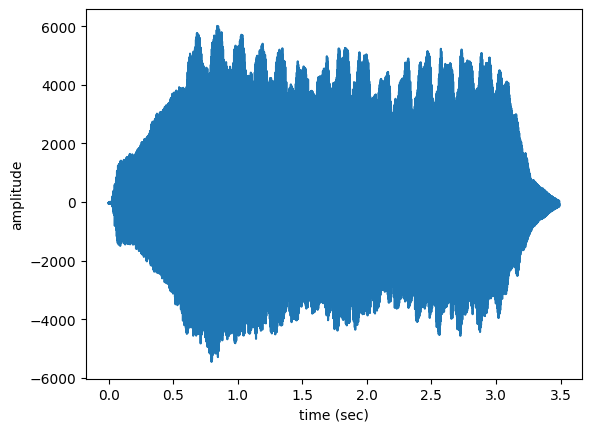

In [ ]:
# here is an example of how to plot the violin data
N = len(signal_v)
T = 1/samplerate_v
t = N/samplerate_v # length of recording
t_array = np.arange(0,t,T)
plt.plot(t_array,signal_v)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

Text(0.5, 1.0, 'Flute')

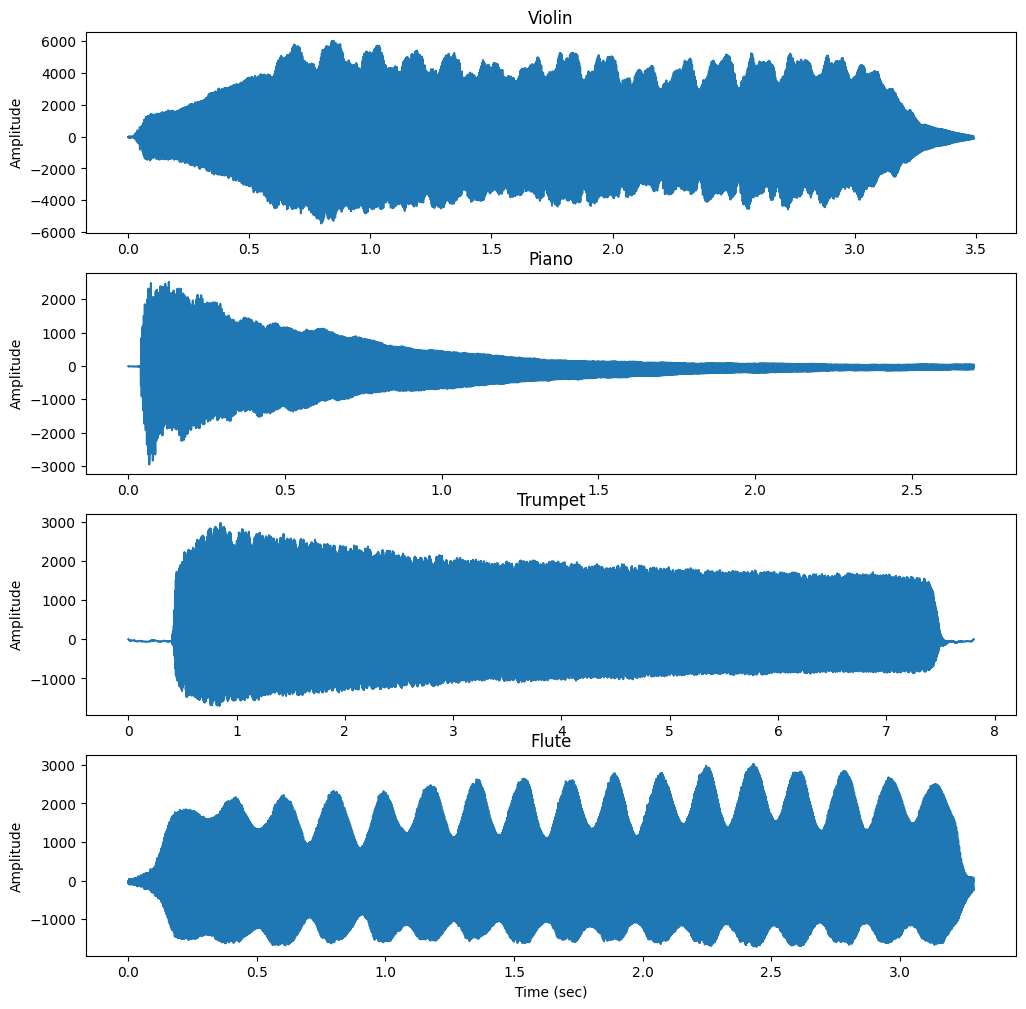

In [ ]:
# compare all 4 audio files in one figure with 4 rows and 1 column
plt.figure(figsize=(12,12))
plt.subplot(4,1,1)
N = len(signal_v)
T = 1/samplerate_v
t = N/samplerate_v # length of recording
t_array = np.arange(0,t,T)
plt.plot(t_array,signal_v)
plt.title('Violin')
plt.ylabel("Amplitude")

plt.subplot(4,1,2)
Np = len(signal_p)
Tp = 1/samplerate_p
tp = Np/samplerate_p # length of recording
t_arrayp = np.arange(0,tp,Tp)
plt.plot(t_arrayp,signal_p)
plt.title('Piano')
plt.ylabel("Amplitude")

plt.subplot(4,1,3)
Nt = len(signal_t)
Tt = 1/samplerate_t
tt = Nt/samplerate_t # length of recording
t_arrayt = np.arange(0,tt,Tt)
plt.plot(t_arrayt,signal_t)
plt.title('Trumpet')
plt.ylabel("Amplitude")

plt.subplot(4,1,4)
Nf = len(signal_f)
Tf = 1/samplerate_f
tf = Nf/samplerate_f # length of recording
t_arrayf = np.arange(0,tf,Tf)
plt.plot(t_arrayf,signal_f)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.title('Flute')

### Plot the fft output (power versus frequency) for all 4 instruments

Remember to just plot the first have of the output arrays:
```
plt.plot(frequency[:N//2+1],np.abs(Y[:N//2+1]))
````

Here are my results for the input signal and fft spectrum:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p4a.png" height=500 ><img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p4b.png" height=500 >


In [ ]:
# plot the output from fft (plot power versus frequency) for all 4 instruments
time_v = np.linspace(0, len(signal_v)/samplerate_v, len(signal_v))
time_p = np.linspace(0, len(signal_p)/samplerate_p, len(signal_p))
time_f = np.linspace(0, len(signal_f)/samplerate_f, len(signal_f))
time_t = np.linspace(0, len(signal_t)/samplerate_t, len(signal_t))

fft_v = np.fft.fft(signal_v)
fft_p = np.fft.fft(signal_p)
fft_f = np.fft.fft(signal_f)
fft_t = np.fft.fft(signal_t)

freq_v = np.fft.fftfreq(len(fft_v),T)
freq_p = np.fft.fftfreq(len(fft_p),Tp)
freq_f = np.fft.fftfreq(len(fft_f),Tf)
freq_t = np.fft.fftfreq(len(fft_t),Tt)

Text(0.5, 1.0, 'Flute')

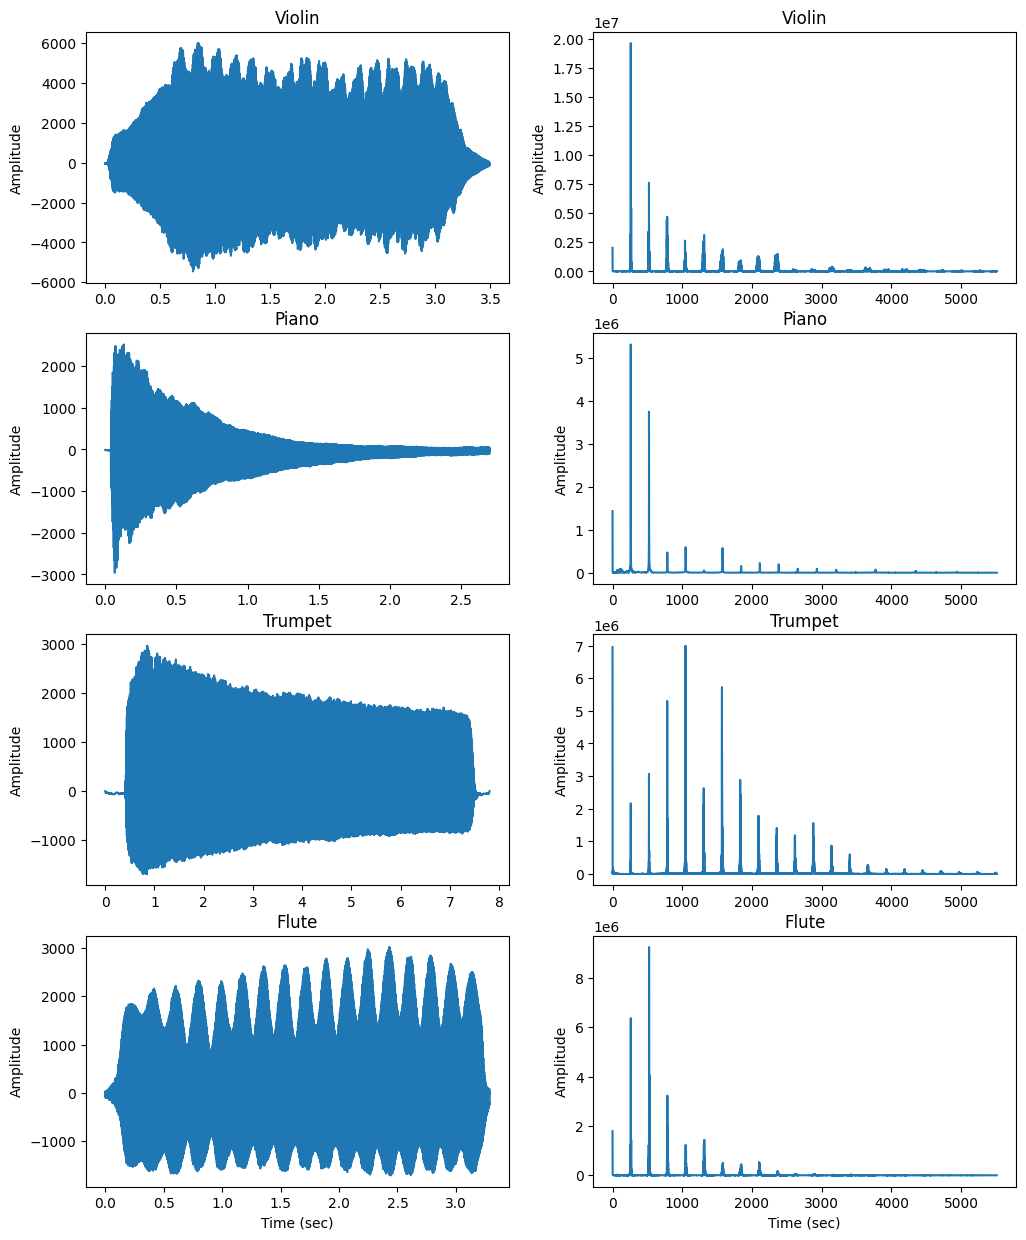

In [ ]:
plt.figure(figsize=(12,15))


plt.subplot(4,2,2)
plt.plot(freq_v[:len(fft_v)//2],np.abs(fft_v[:len(fft_v)//2]))

plt.ylabel("Amplitude")
plt.title('Violin')

plt.subplot(4,2,4)
plt.plot(freq_p[:len(fft_p)//2],np.abs(fft_p[:len(fft_p)//2]))

plt.ylabel("Amplitude")
plt.title('Piano')

plt.subplot(4,2,6)
plt.plot(freq_t[:len(fft_t)//2],np.abs(fft_t[:len(fft_t)//2]))

plt.ylabel("Amplitude")
plt.title('Trumpet')

plt.subplot(4,2,8)
plt.plot(freq_f[:len(fft_f)//2],np.abs(fft_f[:len(fft_f)//2]))
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.title('Flute')

plt.subplot(4,2,1)
N = len(signal_v)
T = 1/samplerate_v
t = N/samplerate_v # length of recording
t_array = np.arange(0,t,T)
plt.plot(t_array,signal_v)
plt.title('Violin')
plt.ylabel("Amplitude")

plt.subplot(4,2,3)
Np = len(signal_p)
Tp = 1/samplerate_p
tp = Np/samplerate_p # length of recording
t_arrayp = np.arange(0,tp,Tp)
plt.plot(t_arrayp,signal_p)
plt.title('Piano')
plt.ylabel("Amplitude")

plt.subplot(4,2,5)
Nt = len(signal_t)
Tt = 1/samplerate_t
tt = Nt/samplerate_t # length of recording
t_arrayt = np.arange(0,tt,Tt)
plt.plot(t_arrayt,signal_t)
plt.title('Trumpet')
plt.ylabel("Amplitude")

plt.subplot(4,2,7)
Nf = len(signal_f)
Tf = 1/samplerate_f
tf = Nf/samplerate_f # length of recording
t_arrayf = np.arange(0,tf,Tf)
plt.plot(t_arrayf,signal_f)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.title('Flute')

### Add noise to a wav file

* Download a wav file from the web, make your own, or use one of the files we already downloaded.

* Read in the file and take the `fft`.

* Add noise to the data by setting one of the fourier coefficients to a non-zero value.

* Take the `ifft` to create a new sound file.

* Play the file with noise

```Audio(data=newsignal, rate=samplerate)```


In [ ]:
samplerate_v, signal_v = wavfile.read('violinC4.wav')

In [ ]:
fft_v = np.fft.fft(signal_v)

fft_v[10] = 1000

new_signal_v = np.fft.ifft(fft_v)

In [ ]:
Audio(data=new_signal_v, rate=samplerate_v)

### Using phyphox

Use phyphox to analyze the frequency spectrum of each wave and compare it to your results.